In [208]:
import pandas

In [209]:
train_set = pandas.read_csv(filepath_or_buffer='dataset/train.csv',delimiter=',')

In [210]:
train_set.Sex = pandas.Categorical(train_set.Sex)
train_set['sex_numerical'] = train_set.Sex.cat.codes
train_set.Embarked = pandas.Categorical(train_set.Embarked)
train_set['embarked_numerical'] = train_set.Embarked.cat.codes
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_numerical,embarked_numerical
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,0


In [211]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from __future__ import print_function

In [212]:
print("* df.head()", train_set.head(), sep="\n", end="\n\n")
print("* df.tail()", train_set.tail(), sep="\n", end="\n\n")

* df.head()
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  sex_numerical  \
0      0         A/5 21171   7.2500   NaN        S              1   
1      0          PC 17599  71.2833   C85        C              0   
2      0  STON/O2. 3101282   7.9250   NaN        S              0   
3      0            113803  53.1

In [213]:
print("* iris types:", train_set["Name"].unique(), sep="\n")

* iris types:
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Ne

In [214]:
features = ['PassengerId','Pclass','Age','SibSp','Parch','sex_numerical','embarked_numerical']

In [215]:
dt = DecisionTreeClassifier(criterion = "entropy",min_samples_split=20, random_state=99)

In [216]:
y = train_set["Survived"]
X = train_set[features].fillna(method='ffill')

In [217]:
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [218]:
X

,PassengerId,Pclass,Age,SibSp,Parch,sex_numerical,embarked_numerical
0,1,3,22.0,1,0,1,2
1,2,1,38.0,1,0,0,0
2,3,3,26.0,0,0,0,2
3,4,1,35.0,1,0,0,2
4,5,3,35.0,0,0,1,2
5,6,3,35.0,0,0,1,1
6,7,1,54.0,0,0,1,2
7,8,3,2.0,3,1,1,2
8,9,3,27.0,0,2,0,2
9,10,2,14.0,1,0,0,0


In [219]:
dotfile = open("dtree2.dot", 'w')
pydotplus.graph_from_dot_data(export_graphviz(dt, out_file = None, feature_names = features)).write_png("dtree2.png")
dotfile.close()

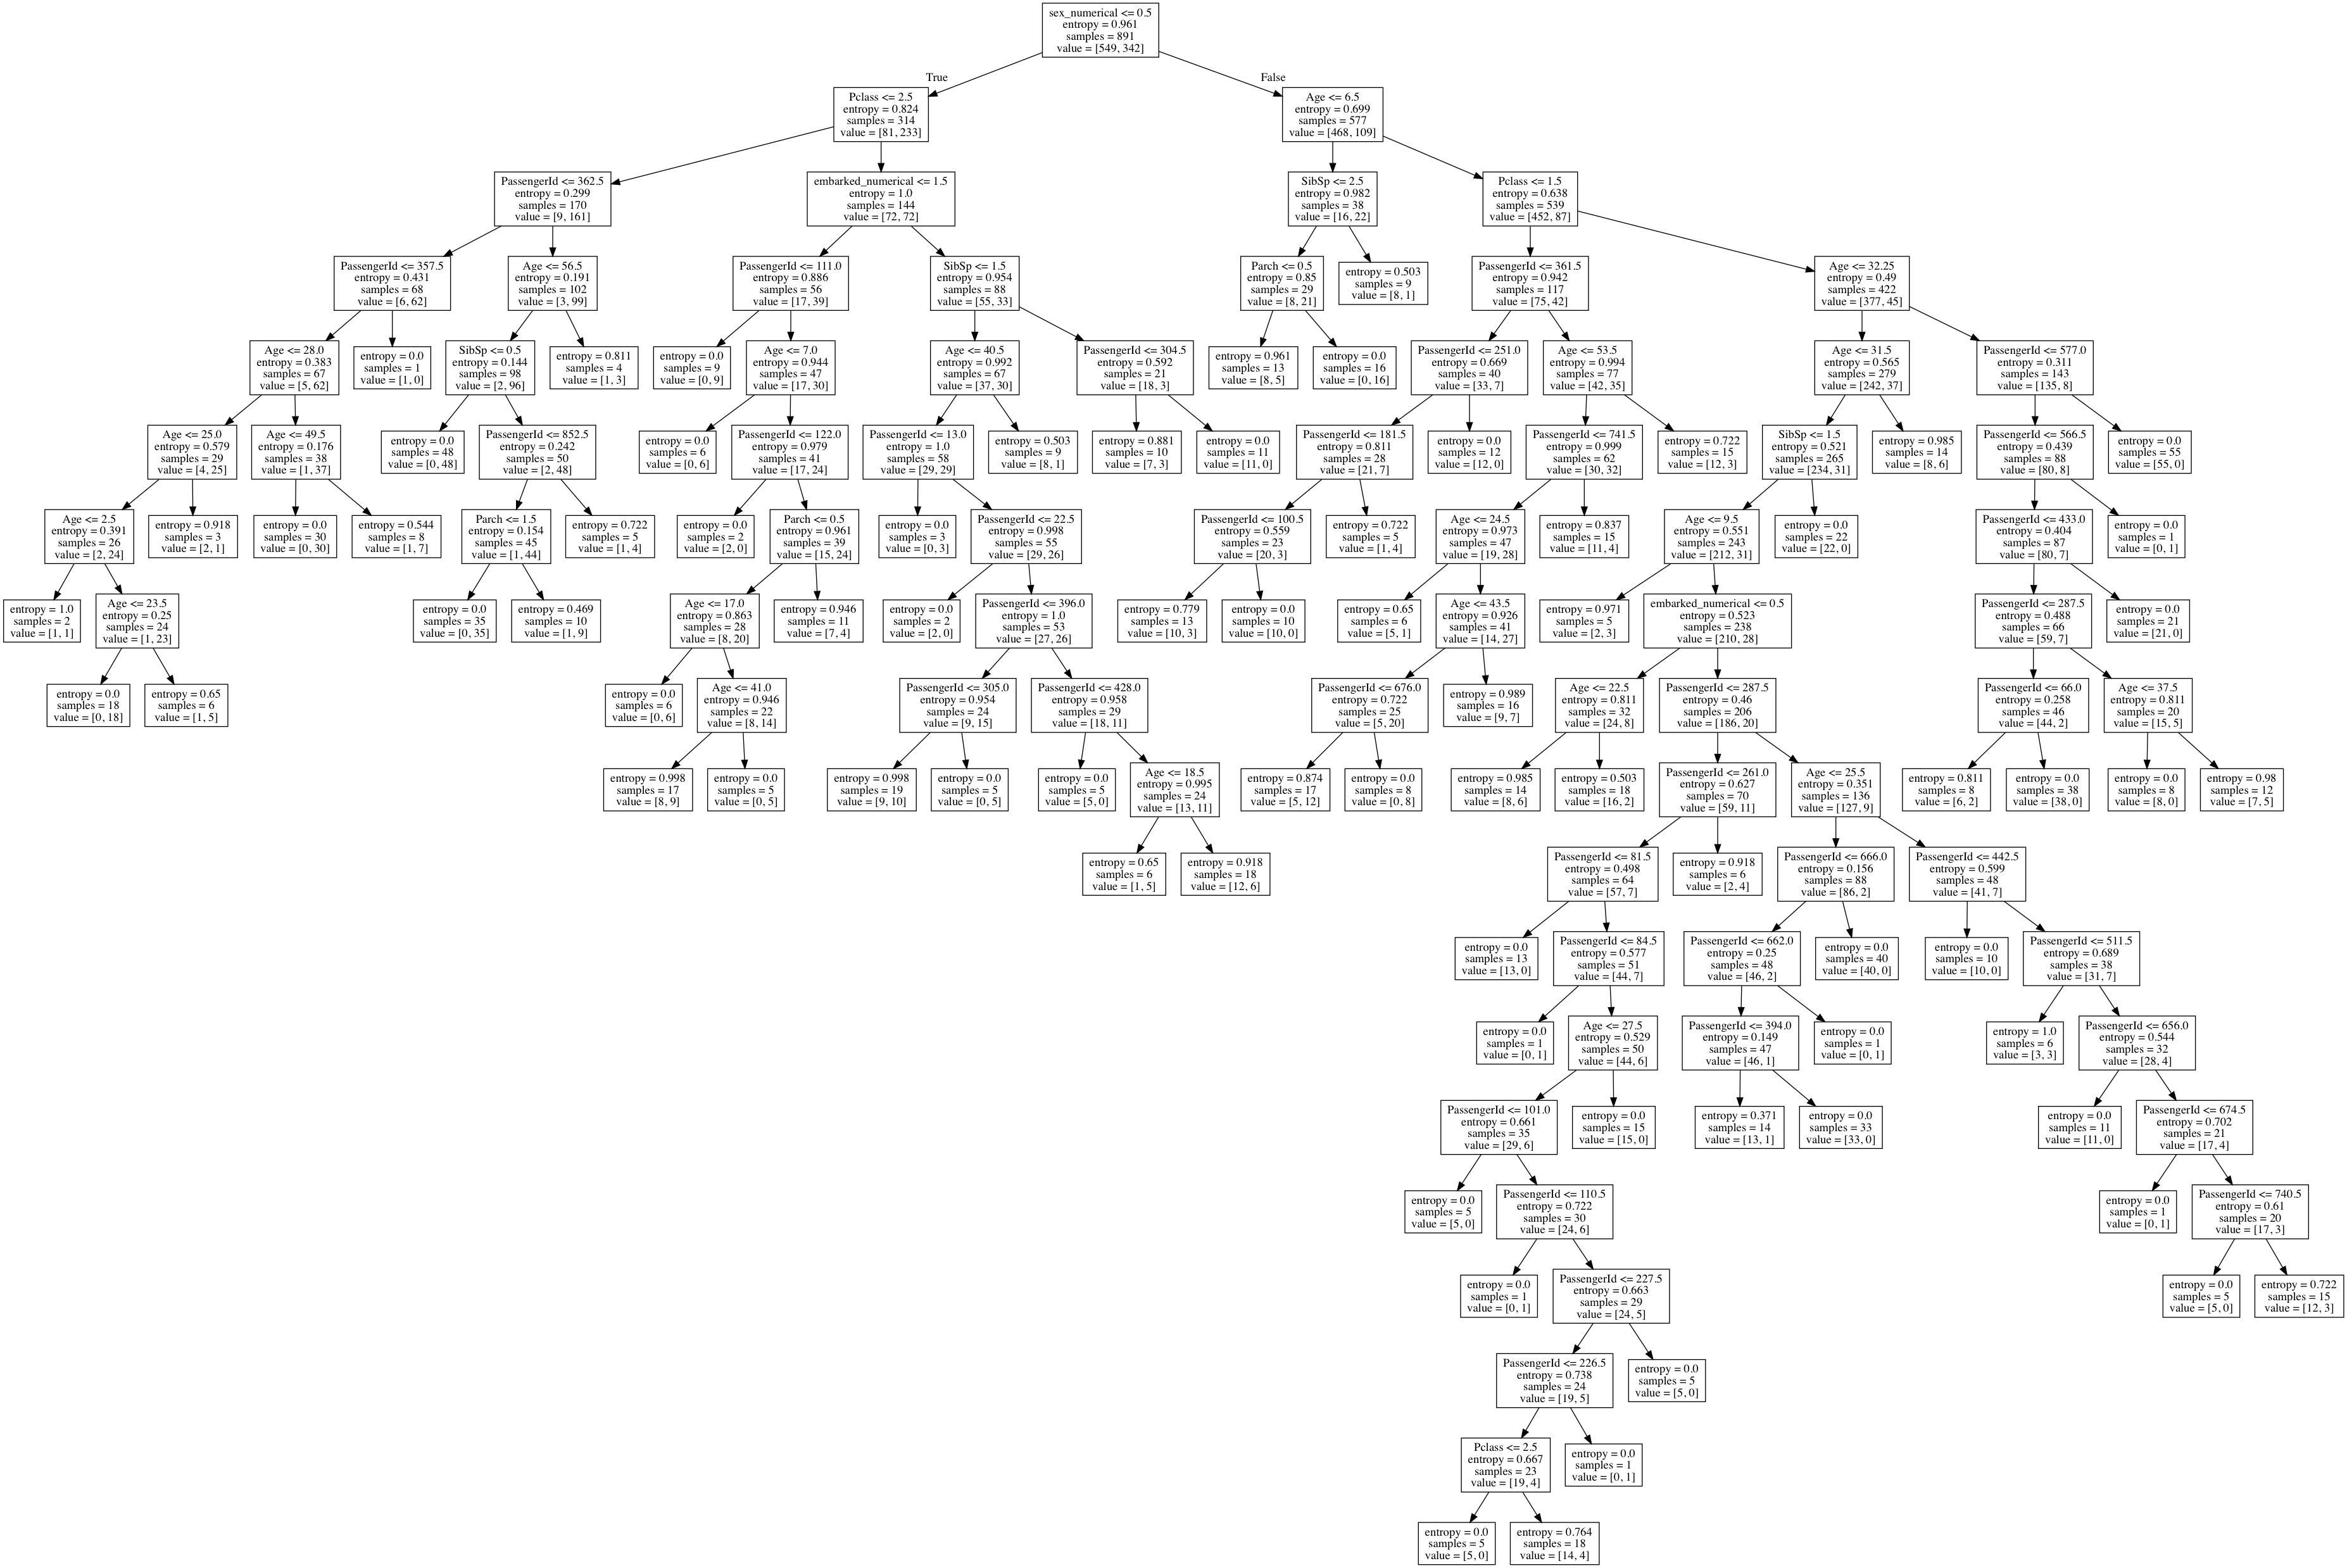

In [220]:
from IPython.display import Image
Image(filename='dtree2.png') 

In [221]:
test_set = pandas.read_csv(filepath_or_buffer='dataset/test.csv',delimiter=',')
test_set.Sex = pandas.Categorical(test_set.Sex)
test_set['sex_numerical'] = test_set.Sex.cat.codes
test_set.Embarked = pandas.Categorical(test_set.Embarked)
test_set['embarked_numerical'] = test_set.Embarked.cat.codes
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_numerical,embarked_numerical
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1,2
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,1,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,1,2


In [222]:
test_set['Survived'] = dt.predict(test_set[features].fillna(method='ffill'))

In [223]:
test_set.to_csv(path_or_buf='results.csv',columns=['PassengerId','Survived'],index=False)